In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
import statsmodels.formula.api as sm
from scipy.stats import norm, skew
import scipy.stats as stats
%matplotlib inline

In [2]:
train = pd.read_csv('../../../Data/train.csv')
test = pd.read_csv('../../../Data/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

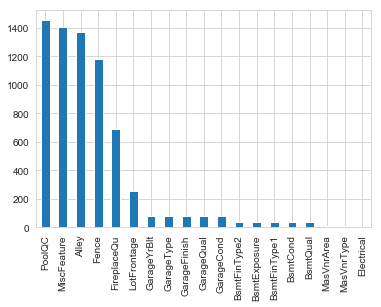

In [7]:
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending = False,inplace=True)
missing.plot.bar()

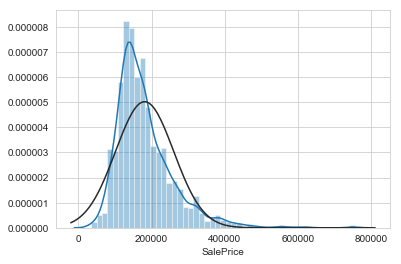

In [8]:
sns.distplot(train['SalePrice'], fit = stats.norm)

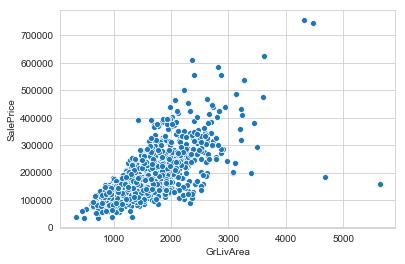

In [9]:
sns.scatterplot(x = train['GrLivArea'],y = train['SalePrice'])

In [10]:
train = train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index)

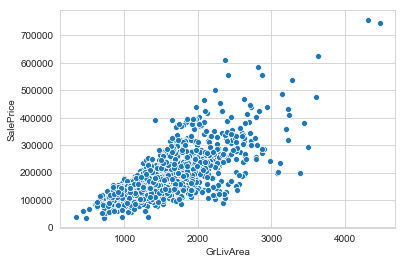

In [11]:
sns.scatterplot(y = train['SalePrice'], x = train['GrLivArea'])

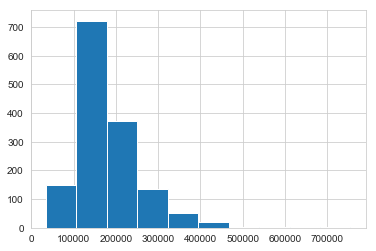

In [12]:
train['SalePrice'].hist()

In [13]:
train['SalePrice'] = np.log1p(train['SalePrice'])

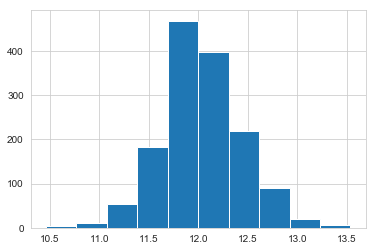

In [14]:
train['SalePrice'].hist()

In [15]:
train_features = train.drop('SalePrice', axis = 1)
y = train['SalePrice'].reset_index(drop=True)
test_features = test
features = pd.concat([train_features, test_features]).reset_index(drop= True)

In [16]:
features.shape

(2917, 80)

In [18]:
features.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


Convert Year Variables to strings

In [20]:
for i in ['MSSubClass', 'YrSold', 'MoSold', 'GarageYrBlt']:
    features[i] = features[i].apply(lambda x: str(x))

In [21]:
def missing_vals(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (total/len(df)*100)
    missing = percent[percent>0]
    return pd.DataFrame( missing, columns = ['Percent'])

In [22]:
missing_vals(features)

,Percent
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageCond,5.450806
GarageQual,5.450806
GarageFinish,5.450806
GarageType,5.382242


- Electrical, KitchenQual has one Na values and Functional has two Na values. The Na values was therefore set to the Mode

In [23]:
for i in 'Functional Electrical KitchenQual'.split():
    features[i] = features[i].fillna(features[i].mode()[0])

- PoolQC ,MiscFeature, Alley, Fence, FireplaceQu 

In [24]:
for i in 'PoolQC MiscFeature Alley Fence FireplaceQu'.split():
    features[i] = features[i].fillna('None')

- LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [25]:
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

- GarageType, GarageFinish, GarageQual ,GarageCond are all categorical values and because there is more than one missing value in all of them, the Na value is replaced with None

In [26]:
for i in 'GarageYrBlt','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'.split():
    features[i] = features[i].fillna('None')

- The missing values are replaced with 0 because if GarageYrBlt, GarageArea, GarageCars, are 0 and numerical features it means that there is no garage


In [27]:
for i in'GarageArea', 'GarageCars'.split():
    features[i] = features[i].fillna(0)

- If any of the numerical Basement variables are zero, it means there is simply no Basement

In [28]:
for i in 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'.split():
    features[i] = features[i].fillna(0)

- If any of the categorical variables for Basement is zero, it means there is simply no Basement

In [29]:
for i in 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'.split():
    features[i] = features[i].fillna('None')

- If there is missing vals in the Masonary category, it simply means no masonary is part of the house, the categorical variable (MasVnrType) is set to None and the numerical variable (MasVnrArea) is set to 0

In [30]:
features["MasVnrType"] = features["MasVnrType"].fillna("None")
features["MasVnrArea"] = features["MasVnrArea"].fillna(0)

- There are 4 missing values in MSZoning, therefore because it is a categorical values, it is set to the mode

In [31]:
features['MSZoning'] = features['MSZoning'].fillna(features['MSZoning'].mode()[0])

- Exterior1, Exterior2 and SaleType has 1 missing value, and because it is a categorical value, it will be set to the mode

In [32]:
for i in 'Exterior1st Exterior2nd SaleType'.split():
    features[i] = features[i].fillna(features[i].mode()[0])

- MSSubClass has one missing value, it will be set to None

In [33]:
features['MSSubClass'] = features['MSSubClass'].fillna("None")

- Utilities, street and PoolQc is dropped because most houses does not have a Pool, and because the only Feature in Utilities are all AllPub except for two, and street

In [34]:
features = features.drop(['Utilities', 'PoolQC'], axis=1)

Lets see if there is more missing values in the Dataset

In [35]:
missing_vals(features)

,Percent


- Some more Feature Engineering

In [36]:
features['YrBuiltandRemod'] = features['YearBuilt']+features['YearRemodAdd']

In [37]:
features['TotSqrSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

In [38]:
features['Haspool'] = features['PoolArea'].apply(lambda x: 1 if x> 0 else 0)
features['HasFireplace'] = features['Fireplaces'].apply(lambda x: 1 if x> 0 else 0)
features['HasGarage'] = features['GarageArea'].apply(lambda x: 1 if x> 0 else 0)
features['HasBsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x> 0 else 0)
features['Has2ndFloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x> 0 else 0)

In [39]:
features = pd.get_dummies(features)
features.shape

(2917, 436)

In [40]:
X = features.iloc[:len(y), :].copy()
X.shape, y.shape

((1458, 436), (1458,))

In [41]:
X['SalePrice'] = y

In [42]:
cor = X.corr()
cor_target = abs(cor["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5].sort_values(ascending = False)
relevant_features.index

Index(['SalePrice', 'TotSqrSF', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', 'YrBuiltandRemod', '1stFlrSF',
       'ExterQual_TA', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'KitchenQual_TA', 'TotRmsAbvGrd', 'Foundation_PConc', 'HasFireplace',
       'FireplaceQu_None', 'ExterQual_Gd'],
      dtype='object')

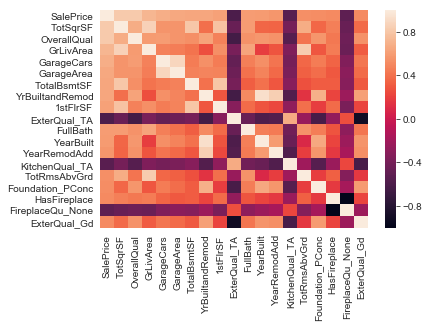

In [43]:
sns.heatmap(X[relevant_features.index].corr())

In [44]:
X = X[relevant_features.index].drop(columns = ['YearBuilt', '1stFlrSF', 'GarageArea', 'SalePrice'], axis = 1)

In [45]:
X.shape

(1458, 15)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = False)

In [47]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
y_pred = lm.predict(X_train)

In [49]:
# check training accuracy
train_lm = lm.predict(X_train)

print('Training MSE')
print('Linear:', metrics.mean_squared_error(y_train, train_lm))

Training MSE
Linear: 0.02189747744656698


In [50]:
test_lm = lm.predict(X_test)

print('Testing MSE')
print('Linear:', metrics.mean_squared_error(y_test, test_lm))

Testing MSE
Linear: 0.02171901436883795


In [51]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [52]:
# make predictions
predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 0.10764765328849339


In [53]:
from sklearn.model_selection import cross_val_score
xgb_test = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
cv_score = cross_val_score(xgb_test, X_train, y_train, cv = 5, n_jobs=-1)

In [54]:
print('CV Score is: '+ str(np.mean(cv_score)))

CV Score is: 0.8580729223907493


In [57]:
cv_score = cross_val_score(my_model, X_train, y_train, cv = 5, n_jobs=-1)
print('CV Score is: '+ str(np.mean(cv_score)))

CV Score is: 0.8598229073871343
